In [79]:
# import packages

import matplotlib.pyplot as plt
import numpy as np
from lacbox.io import load_pwr, load_oper
from pathlib import Path
from our_values import *
import pandas as pd
from lacbox.io import load_ctrl_txt
from scipy.optimize import curve_fit
from lacbox.io import ReadHAWC2
from lacbox.test import test_data_path

## DTU 10MW

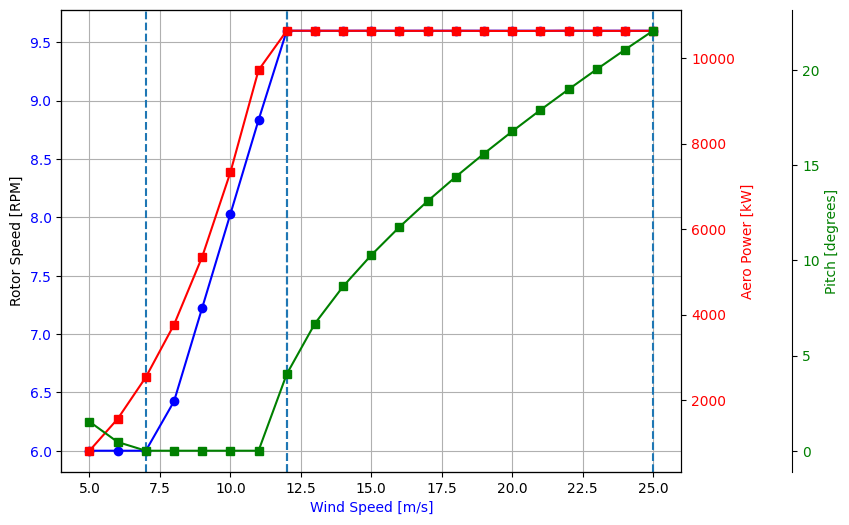

In [80]:
# evaluate regions for dtu 10 MW following lecture 6

dtu_path = 'dtu_10mw/res_hawc2s/dtu_10mw_hawc2s_21wsp_ctrltune.pwr'
dtu_data = load_pwr(dtu_path)
#print(dtu_data.keys())

#regions = [2,3,5,13]        # from lecture, does not make sense
regions = [3,8,8,21]        # from detected regions, in log file

fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot wind speed vs rotor speed
ax1.plot(dtu_data['V_ms'], dtu_data['Speed_rpm'],  'b-o', label='Rotor Speed [RPM]')
ax1.set_ylabel('Rotor Speed [RPM]')
ax1.set_xlabel('Wind Speed [m/s]', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for aerodynamic power
ax2 = ax1.twinx()
ax2.plot(dtu_data['V_ms'], dtu_data['P_kW'], 'r-s', label='Aero Power [kW]')
ax2.set_ylabel('Aero Power [kW]', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Create a second y-axis for aerodynamic power
ax3 = ax1.twinx()
ax3.plot(dtu_data['V_ms'], dtu_data['Pitch_deg'], 'g-s', label='Pitch [degrees]')
ax3.set_ylabel('Pitch [degrees]', color='g')
ax3.tick_params(axis='y', labelcolor='g')
ax3.spines['right'].set_position(('outward', 80))  # Offset by 120 points

# add regions
for i in regions:
    ax1.axvline(x=dtu_data['V_ms'][i-1], linestyle='--')

ax1.grid(True)

plt.show()


## REDESIGN

minimum omega = 2.9985 ≈ 3.0 rpm


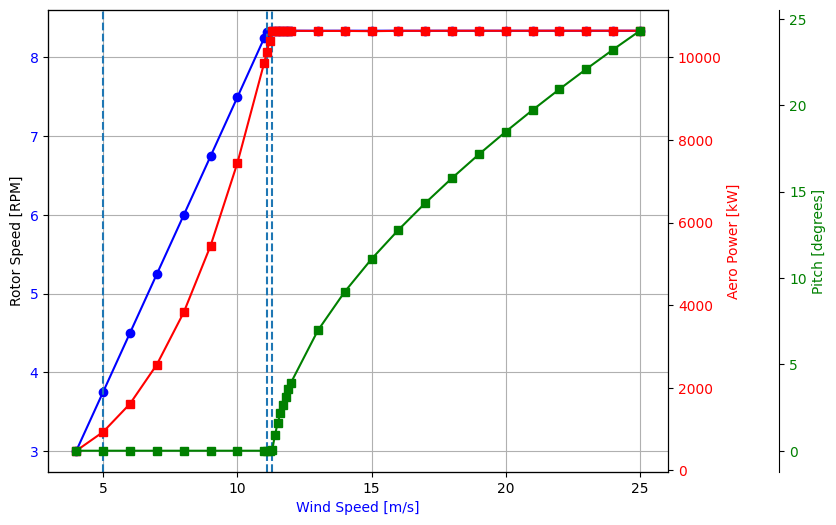

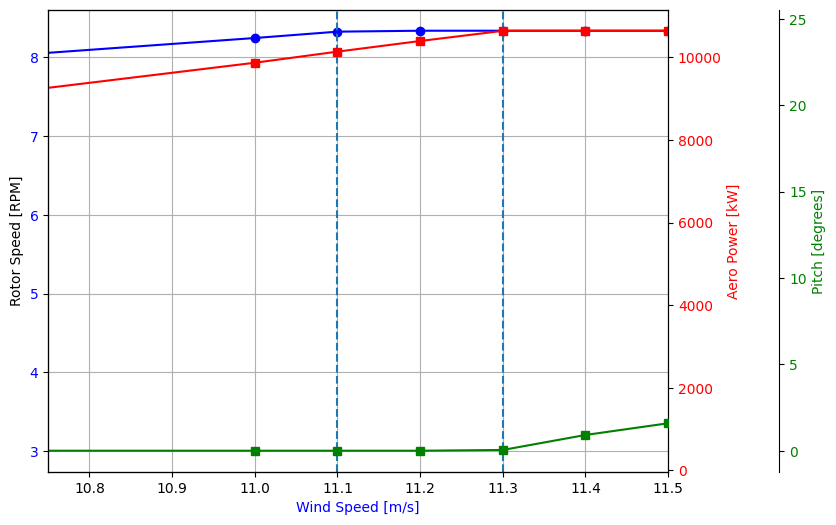

In [81]:
# compute omega minimum to insert in the htc file
V_start = 4
omega_start = TSR_OPT*V_start / R_Y*30/np.pi
print(f'minimum omega = {omega_start:.4f} ≈ {np.round(omega_start,1)} rpm')


# evaluate regions
redesign_path = 'our_design/res_hawc2s/Group1_redesign_hawc2s_ctrltune.pwr'
redesign_data = load_pwr(redesign_path)
#print(dtu_data.keys())

#regions = [2,3,5,13]        # from lecture, does not make sense
regions = [1,8,10,31]        # from detected regions, in log file

fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot wind speed vs rotor speed
ax1.plot(redesign_data['V_ms'], redesign_data['Speed_rpm'],  'b-o', label='Rotor Speed [RPM]')
ax1.set_ylabel('Rotor Speed [RPM]')
ax1.set_xlabel('Wind Speed [m/s]', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for aerodynamic power
ax2 = ax1.twinx()
ax2.plot(redesign_data['V_ms'], redesign_data['P_kW'], 'r-s', label='Aero Power [kW]')
ax2.set_ylabel('Aero Power [kW]', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Create a second y-axis for aerodynamic power
ax3 = ax1.twinx()
ax3.plot(redesign_data['V_ms'], redesign_data['Pitch_deg'], 'g-s', label='Pitch [degrees]')
ax3.set_ylabel('Pitch [degrees]', color='g')
ax3.tick_params(axis='y', labelcolor='g')
ax3.spines['right'].set_position(('outward', 80))  # Offset by 120 points

# add regions
for i in regions[:-1]:
    ax1.axvline(x=redesign_data['V_ms'][i], linestyle='--')

ax1.grid(True)
plt.show()


fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot wind speed vs rotor speed
ax1.plot(redesign_data['V_ms'], redesign_data['Speed_rpm'],  'b-o', label='Rotor Speed [RPM]')
ax1.set_ylabel('Rotor Speed [RPM]')
ax1.set_xlabel('Wind Speed [m/s]', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for aerodynamic power
ax2 = ax1.twinx()
ax2.plot(redesign_data['V_ms'], redesign_data['P_kW'], 'r-s', label='Aero Power [kW]')
ax2.set_ylabel('Aero Power [kW]', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Create a second y-axis for aerodynamic power
ax3 = ax1.twinx()
ax3.plot(redesign_data['V_ms'], redesign_data['Pitch_deg'], 'g-s', label='Pitch [degrees]')
ax3.set_ylabel('Pitch [degrees]', color='g')
ax3.tick_params(axis='y', labelcolor='g')
ax3.spines['right'].set_position(('outward', 80))  # Offset by 120 points

# add regions
for i in regions[:-1]:
    ax1.axvline(x=redesign_data['V_ms'][i], linestyle='--')

ax1.set_xlim(10.75,11.5)
ax1.grid(True)
plt.show()



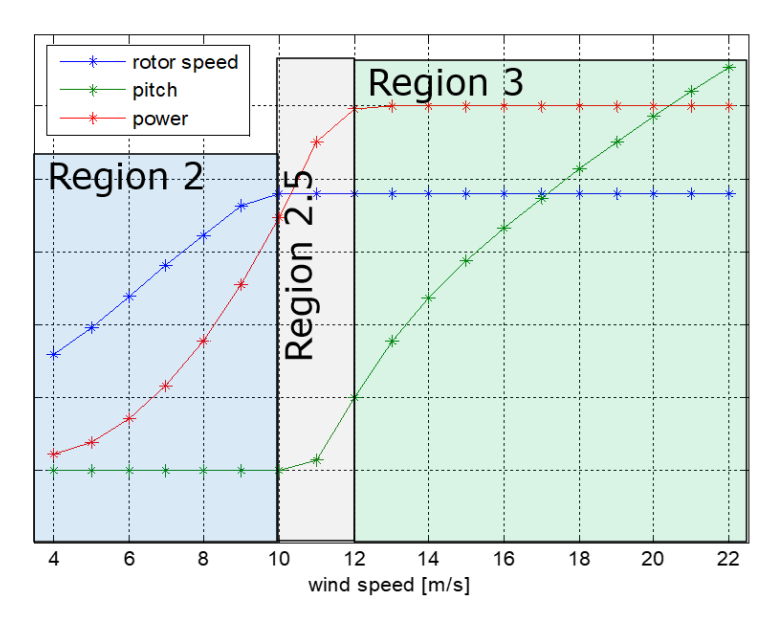

In [82]:
# hawc2s values

def load_ctrl_tuning(file_path):
    with open(file_path, 'r') as file:
        file_content = file.read()

    # Split the file content into lines
    lines = file_content.splitlines()

    # Initialize the dictionary with predefined keys
    data_dict = {
        "K_opt": None,
        "I": None,
        "Kp_torque": None,
        "Ki_torque": None,
        "Kp_pitch": None,
        "Ki_pitch": None,
        "KK1": None,
        "KK2": None,
        "dQ_dtheta_0": None
    }

    # Manually assign values based on line positions
    data_dict["K_opt"] = float(lines[1].split('=')[1].split()[0])
    data_dict["I"] = float(lines[3].split('=')[1].split()[0])
    data_dict["Kp_torque"] = float(lines[4].split('=')[1].split()[0])
    data_dict["Ki_torque"] = float(lines[5].split('=')[1].split()[0])
    data_dict["Kp_pitch"] = float(lines[7].split('=')[1].split()[0])
    data_dict["Ki_pitch"] = float(lines[8].split('=')[1].split()[0])
    data_dict["KK1"] = float(lines[9].split('=')[1].split()[0])
    data_dict["KK2"] = float(lines[9].split('=')[2].split()[0])
    data_dict["dQ_dtheta_0"] = float(lines[9].split('=')[3].split()[0])

    #data_dict["dQ_dtheta_0"] = np.rad2deg(data_dict["dQ_dtheta_0"])*1e3



    fit = pd.read_csv(file_path, sep='\\s+', skiprows=17, header=None)
    fit.columns = ['theta', 'dq_dtheta', 'fit_theta', 'dq_domega', 'fit_omega']

    return data_dict, fit

redesign_ctrl_tuning_path = 'our_design/res_hawc2s/Group1_redesign_hawc2s_ctrltune_ctrl_tuning.txt'
hawc2s_data,  fit_redesign= load_ctrl_tuning(redesign_ctrl_tuning_path)


# theoretical values

def fit_curve_KK(fit_redesign):

    theta = fit_redesign['theta']
    dQdtheta = fit_redesign['dq_dtheta']  # Replace with your actual y data
    c = hawc2s_data["dQ_dtheta_0"]

    # Fit the model to the data
    def model(x, K1, K2):
        return c * (1 + x/K1 + (x**2)/K2)

    initial_guess = [1, 1]  # Initial guess for K1 and K2
    params, covariance = curve_fit(model, theta, dQdtheta, p0=initial_guess)

    # Extract the optimal values of K1 and K2
    KK1, KK2 = params
    dQdtheta_fit =  model(theta, KK1, KK2)

    return KK1, KK2, dQdtheta_fit

def compute_ctrl_tuning(hawc2s_data, fit_redesign):

    eta = 1
    I_r = 1         # rotor inertia, what is the value?
    I_g = 1         # equivalent generator inertia, what is the value?
    n_g = 1         # gear box ratio
    I = I_r + n_g**2 * I_g
    I = hawc2s_data['I']

    # region 2: optinmal CP tracking
    K_opt = eta * RHO * np.pi * R_Y**5 * CP_MAX / (2 * TSR_OPT**3)

    # region 2.5: rotor speed regulation
    omega_speed_torque = 0.05*2*np.pi
    zeta_speed_torque = 0.7
    Kp_torque = 2 * eta * zeta_speed_torque * omega_speed_torque * I
    Ki_torque = eta * I * omega_speed_torque**2

    # region 3:
    omega_speed_pitch = 0.06*2*np.pi
    zeta_speed_pitch = 0.7
    KK1, KK2, dQdtheta_fit = fit_curve_KK(fit_redesign)
    dQ_dtheta_0 = np.rad2deg(hawc2s_data['dQ_dtheta_0'])*1e3     # ???

    dQ_dtheta = dQ_dtheta_0
    dQg_domega = -POWER_MAX / ((OMEGA_MAX*2*np.pi/60)**2)

    Ki_pitch = (omega_speed_pitch**2 * I) / (- dQ_dtheta)
    Kp_pitch = (2 * zeta_speed_pitch * omega_speed_pitch * I - 1/eta *dQg_domega) / (-dQ_dtheta)
    # K_P_P = -(2*(I)*omega_P*zeta+Power/rot_speed**2)/dqdtheta
    
    dQ_dtheta_0  = np.deg2rad(dQ_dtheta_0/1e3)
    th_data = {
            "K_opt": K_opt,
            "I": I,
            "Kp_torque": Kp_torque,
            "Ki_torque": Ki_torque,
            "Kp_pitch": Kp_pitch,
            "Ki_pitch": Ki_pitch,
            "KK1": KK1,
            "KK2": KK2,
            "dQ_dtheta_0": dQ_dtheta_0
        }
    
    return th_data

th_data = compute_ctrl_tuning(hawc2s_data, fit_redesign)


# comparison
print(f'element     |   theoretical   |      hawc2s     | % difference ')
for key in th_data.keys():
    print(f"{key:12}| {th_data[key]:15.4f} | {hawc2s_data[key]:15.4f} | {(th_data[key] - hawc2s_data[key])/hawc2s_data[key]*100:10.3f}")



element     |   theoretical   |      hawc2s     | % difference 
K_opt       |   15032154.1729 |   15395600.0000 |     -2.361
I           |  192574000.0000 |  192574000.0000 |      0.000
Kp_torque   |   84698468.9141 |   84698600.0000 |     -0.000
Ki_torque   |   19006291.9794 |   19006300.0000 |     -0.000
Kp_pitch    |          1.8249 |          1.8250 |     -0.001
Ki_pitch    |          0.4321 |          0.4321 |     -0.000
KK1         |         13.7800 |         13.7800 |     -0.000
KK2         |        484.8547 |        484.8541 |      0.000
dQ_dtheta_0 |      -1105.4973 |      -1105.4973 |     -0.000


In [83]:
OMEGA_MAX
0.8731395227123424

0.8731395227123424

Fitted K1: 13.779986042012013
Fitted K2: 484.8546700184538


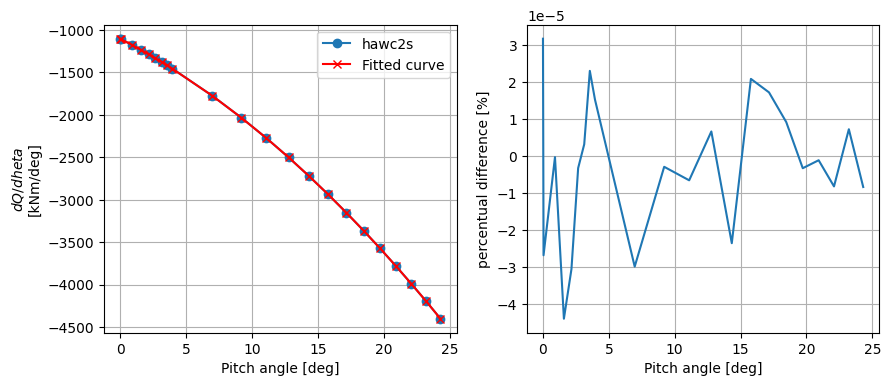

'\n# fit at different theta\nfig1, axs1 = plt.subplots(1, 2, num=1, figsize=(10,4), clear=True) \naxs1[0].plot(fit_redesign[\'theta\'], fit_redesign[\'fit_theta\'], marker=\'o\', label=\'fitted\')\naxs1[0].plot(fit_redesign[\'theta\'], fit_redesign[\'dq_dtheta\'], marker=\'x\', label=\'original\')\naxs1[0].set_ylabel("dQ/dtheta")\naxs1[0].set_xlabel("theta")\naxs1[0].grid(True)  # Add grid\n\naxs1[1].plot(fit_redesign[\'theta\'], fit_redesign[\'fit_omega\'], marker=\'o\')\naxs1[1].plot(fit_redesign[\'theta\'], fit_redesign[\'dq_domega\'], marker=\'x\')\naxs1[1].set_ylabel("dQ/dtomega")\naxs1[1].set_xlabel("theta")\naxs1[1].grid(True)  # Add grid\nplt.tight_layout()\n#plt.subplots_adjust(bottom=0.15)  # Add more space at the bottom if needed\n#fig1.legend(loc=\'lower center\', ncol=7, bbox_to_anchor=(0.5, -0.005))\nfig1.legend()\nplt.show()\n'

In [84]:
# analyitical derivations

ctrltune_dict = load_ctrl_txt(redesign_ctrl_tuning_path)
hawc2s_data,  fit_redesign= load_ctrl_tuning(redesign_ctrl_tuning_path)
aero_gains_df = ctrltune_dict['aero_gains']

KK1, KK2, dQdtheta_fit = fit_curve_KK(fit_redesign)


# Print the fitted parameters
print(f"Fitted K1: {KK1}")
print(f"Fitted K2: {KK2}")

# Plot the original data and the fitted curve
fig1, axs1 = plt.subplots(1, 2, num=1, figsize=(10,4), clear=True) 
axs1[0].plot(fit_redesign['theta'], fit_redesign['fit_theta'], marker='o', label='hawc2s')
axs1[0].plot(fit_redesign['theta'], dQdtheta_fit, label='Fitted curve', marker='x', color='red')
axs1[0].legend()
axs1[0].grid()
axs1[0].set_xlabel('Pitch angle [deg]')
axs1[0].set_ylabel('$dQ/d\theta$\n[kNm/deg]')

axs1[1].plot(fit_redesign['theta'], (fit_redesign['fit_theta'] - dQdtheta_fit)/fit_redesign['fit_theta']*100)
axs1[1].grid()
axs1[1].set_xlabel('Pitch angle [deg]')
axs1[1].set_ylabel('percentual difference [%]')
plt.show()



'''
# fit at different theta
fig1, axs1 = plt.subplots(1, 2, num=1, figsize=(10,4), clear=True) 
axs1[0].plot(fit_redesign['theta'], fit_redesign['fit_theta'], marker='o', label='fitted')
axs1[0].plot(fit_redesign['theta'], fit_redesign['dq_dtheta'], marker='x', label='original')
axs1[0].set_ylabel("dQ/dtheta")
axs1[0].set_xlabel("theta")
axs1[0].grid(True)  # Add grid

axs1[1].plot(fit_redesign['theta'], fit_redesign['fit_omega'], marker='o')
axs1[1].plot(fit_redesign['theta'], fit_redesign['dq_domega'], marker='x')
axs1[1].set_ylabel("dQ/dtomega")
axs1[1].set_xlabel("theta")
axs1[1].grid(True)  # Add grid
plt.tight_layout()
#plt.subplots_adjust(bottom=0.15)  # Add more space at the bottom if needed
#fig1.legend(loc='lower center', ncol=7, bbox_to_anchor=(0.5, -0.005))
fig1.legend()
plt.show()
'''


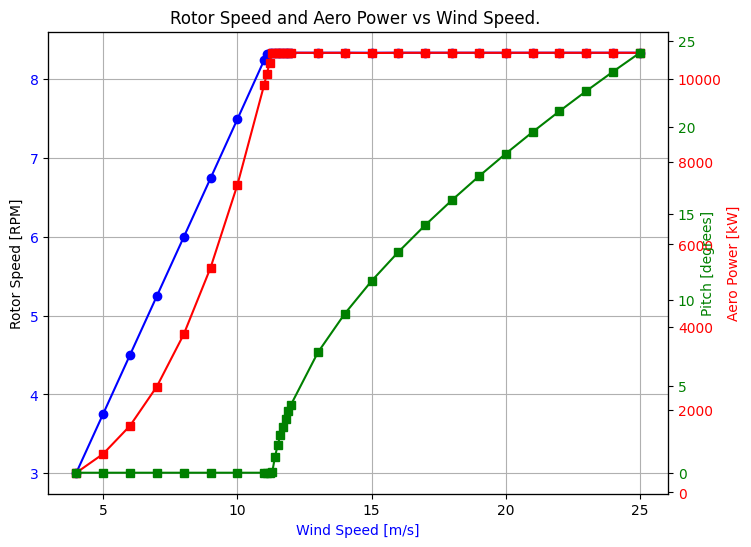

In [85]:

data = load_oper("our_design/data/Group1_redesign_flex.opt")

wind_speed =data['ws_ms']#[i for i in range(len(data['ws_ms']))]
rotor_speed = data['rotor_speed_rpm']
aero_power = data['power_kw']
pitch = data['pitch_deg']
# Create the plot with a secondary y-axis for power
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot wind speed vs rotor speed
ax1.plot(wind_speed, rotor_speed,  'b-o', label='Rotor Speed [RPM]')
ax1.set_ylabel('Rotor Speed [RPM]')
ax1.set_xlabel('Wind Speed [m/s]', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for aerodynamic power
ax2 = ax1.twinx()
ax2.plot(wind_speed, aero_power, 'r-s', label='Aero Power [kW]')
ax2.set_ylabel('Aero Power [kW]', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Create a second y-axis for aerodynamic power
ax3 = ax1.twinx()
ax3.plot(wind_speed, pitch, 'g-s', label='Pitch [degrees]')
ax3.set_ylabel('Pitch [degrees]', color='g')
ax3.tick_params(axis='y', labelcolor='g')

# Add grid and titles
plt.title('Rotor Speed and Aero Power vs Wind Speed. ')
ax1.grid(True)

plt.show()



In [86]:
rho = 1.225
R = 92.52423873284587
CP_max = 0.4414323017299089
lambda_opt = 7.2631578947368425
eta = 1
Power = 10638.3E+03
V = 11.122788574520852 #m/s
rot_speed = lambda_opt/R*V
omega_T = 0.05*2*np.pi

omega_P = 0.06*2*np.pi

zeta = 0.7

#Taken from the dtu_10mw_hawc2s_ctrl_ctrl_tuning.txt
"""WE MIGHT HAVE TO CHANGE THOSE VALUES"""
I = 0.161050E+09
dqdtheta = -1044.85156E+03*180/(np.pi)

K_opt = (eta * rho * np.pi * R**5 * CP_max / (2 * lambda_opt**3))


K_I_T = eta*(I)*omega_T**2

K_P_T = eta*(2*(I)*omega_T*zeta)

K_I_P = -(I)*omega_P**2/dqdtheta

K_P_P = -(2*(I)*omega_P*zeta+Power/rot_speed**2)/dqdtheta

print(K_opt, K_P_T, K_I_T, K_P_P, K_I_P)
print(rot_speed)

15032154.17367775 70833489.56048906 15894997.88795441 1.6529428050185775 0.3823364811255895
0.8731395227123424


## PART 2

In [87]:
print(f'file name |     Kp   |     Ki   ')

for i in range(0,6):
    path = f'our_design/res_hawc2s/Group1_redesign_hawc2s_ctrl_C{i+1}_ctrl_tuning.txt'
    data,  fit= load_ctrl_tuning(path)

    print(f'    C{i+1}    | {data["Kp_pitch"]:8.4f} | {data["Ki_pitch"]:8.4f}')


file name |     Kp   |     Ki   
    C1    |   1.5228 |   0.2934
    C2    |   0.4769 |   0.0117
    C3    |   2.8301 |   1.1735
    C4    |   1.3074 |   0.2934
    C5    |   0.2615 |   0.0117
    C6    |   2.6147 |   1.1735


## PART 3

In [88]:
#path = f'our_design/res_hawc2s/Group1_redesign_hawc2s_ctrl_C1_ctrl_tuning.txt'
#ctrltune_dict = load_ctrl_txt(path)

fname = f'our_design/res/Group1_redesign_hawc2s_step_C1.hdf5'
h2res = ReadHAWC2(fname)

names, units, desc = h2res.chaninfo
print('There are', len(names), 'channels in this output file.')
print(names)

idx_power = np.where(['DLL inp   2:   2' in name for name in names])[0]

There are 113 channels in this output file.
['Time', 'bea1 angle', 'bea1 angle_speed', 'bea2 angle', 'bea2 angle_speed', 'bea2 angle', 'bea2 angle_speed', 'bea2 angle', 'bea2 angle_speed', 'Omega', 'Ae rot. torque', 'Ae rot. power', 'Ae rot. thrust', 'WSP gl. coo.,Vx', 'WSP gl. coo.,Vy', 'WSP gl. coo.,Vz', 'WSP gl. coo.,Abs_vhor', 'WSP gl. coo.,Vdir_hor', 'Mx coo: tower', 'My coo: tower', 'Mz coo: tower', 'Mx coo: tower', 'My coo: tower', 'Mz coo: tower', 'Mx coo: shaft', 'My coo: shaft', 'Mz coo: shaft', 'Mx coo: hub1', 'My coo: hub1', 'Mz coo: hub1', 'Mx coo: hub2', 'My coo: hub2', 'Mz coo: hub2', 'Mx coo: hub3', 'My coo: hub3', 'Mz coo: hub3', 'Mx coo: blade1', 'My coo: blade1', 'Mz coo: blade1', 'Mx coo: blade2', 'My coo: blade2', 'Mz coo: blade2', 'Mx coo: blade3', 'My coo: blade3', 'Mz coo: blade3', 'Mx coo: hub1', 'My coo: hub1', 'Mz coo: hub1', 'State pos x  coo: global', 'State pos y  coo: global', 'State acc x  coo: global', 'State acc y  coo: global', 'State pos x  coo: blad

DLL :  2 inpvec :   2  pelec [w]
DLL :  2 inpvec :   2  pelec [w]
DLL :  2 inpvec :   2  pelec [w]


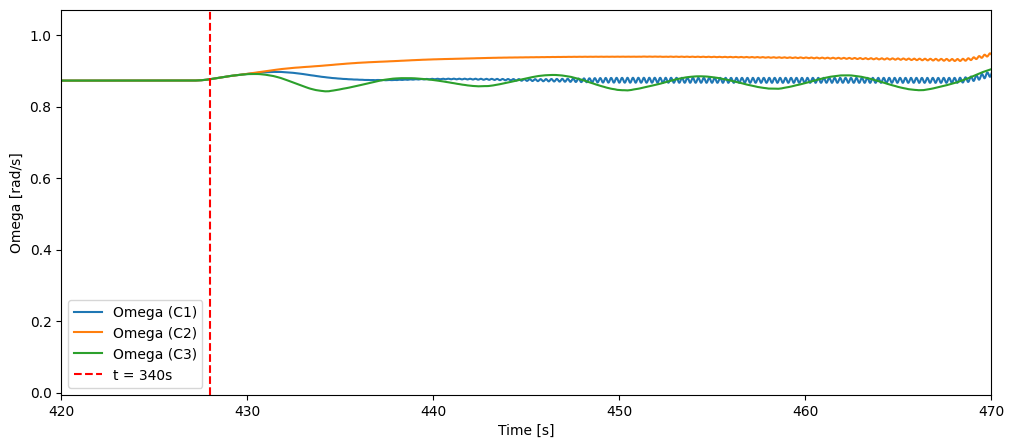

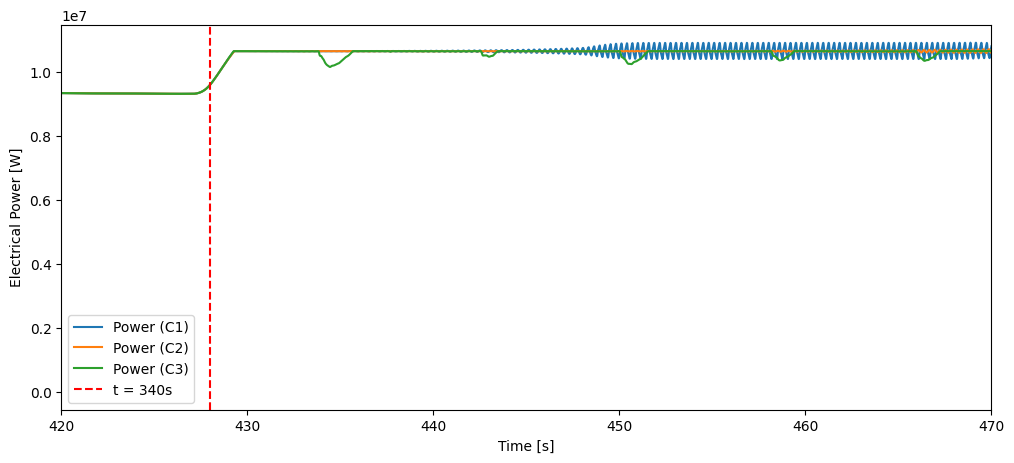

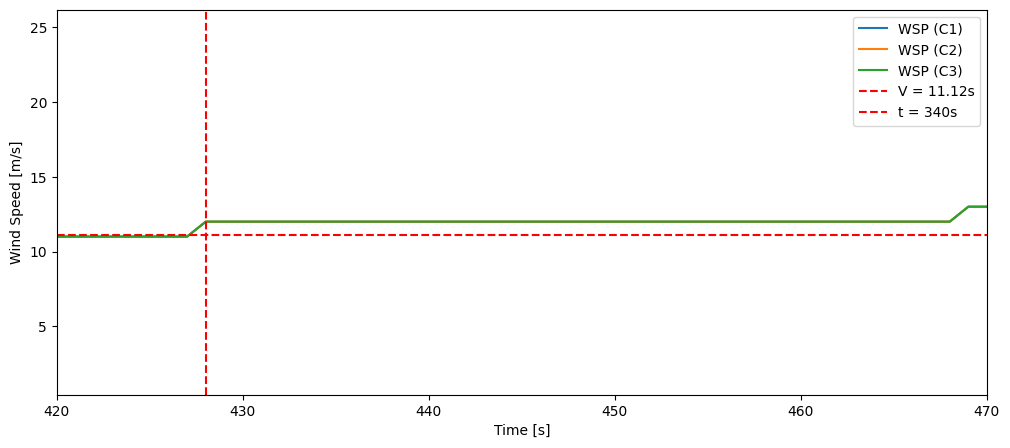

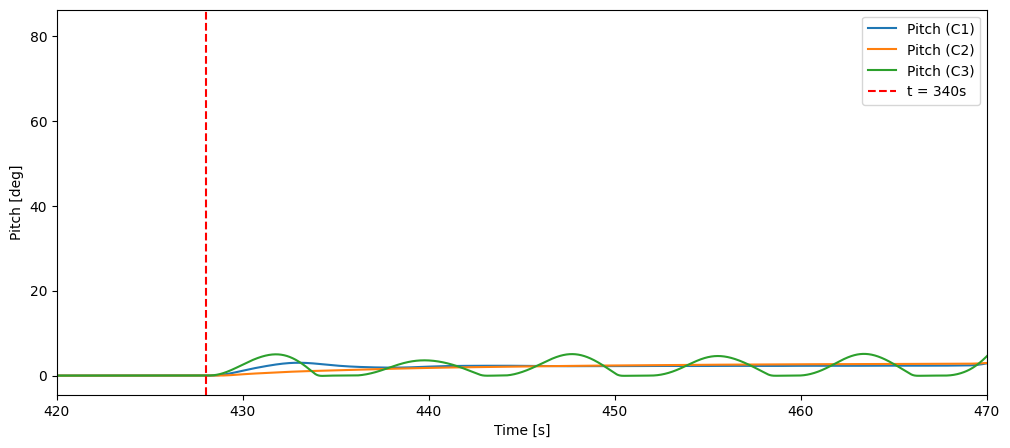

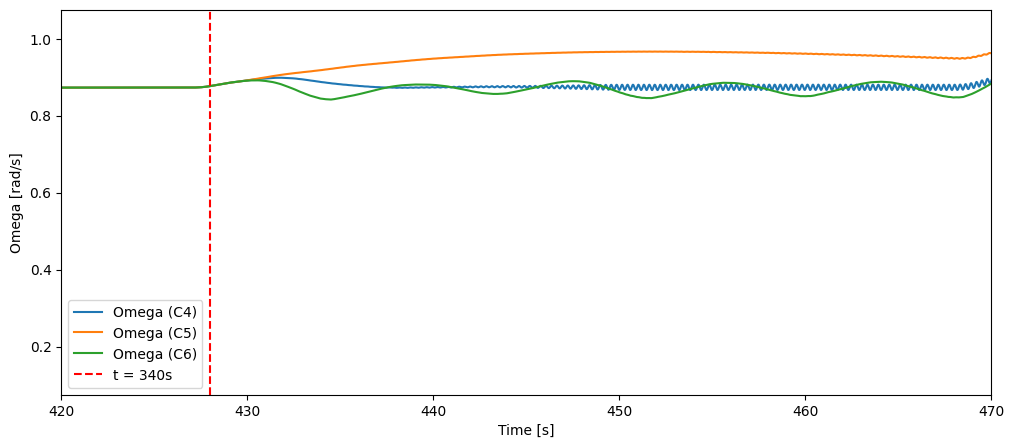

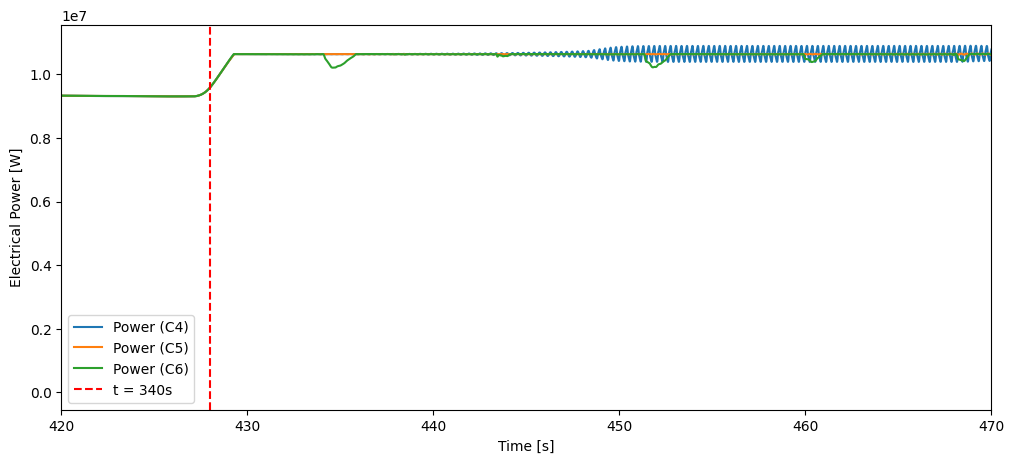

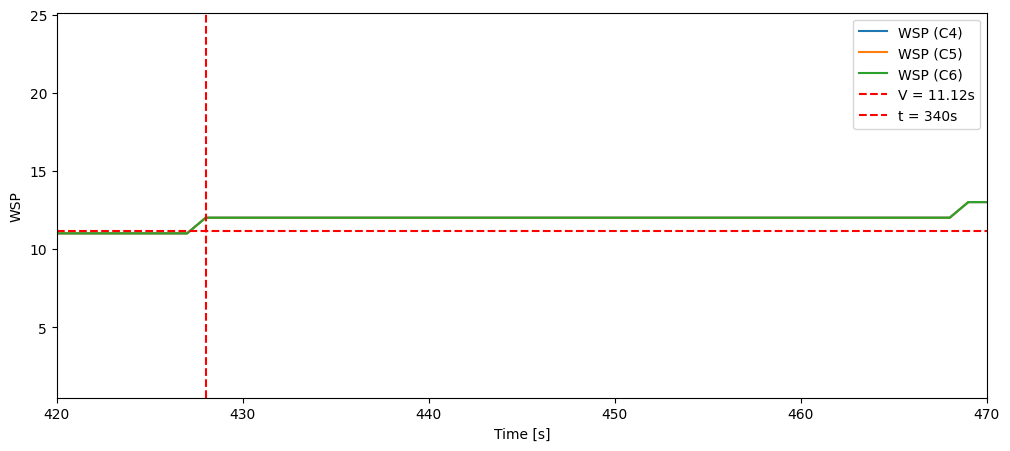

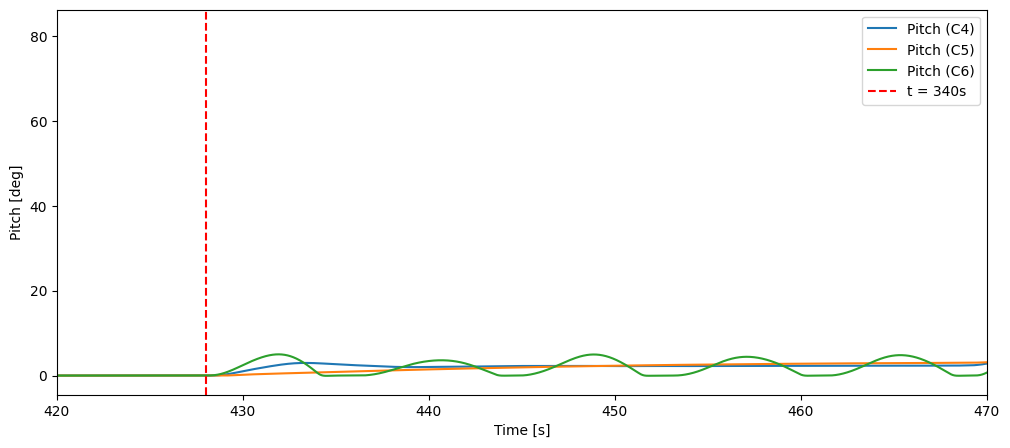

In [89]:


# Define the vertical line position
vertical_line_time = 428
xmin = 420
xmax = 470
horizontal_line_wsp = V_RATED_Y

# Create figure and axes for each variable
fig_omega, ax_omega = plt.subplots(figsize=(12, 5))
fig_power, ax_power = plt.subplots(figsize=(12, 5))
fig_wsp, ax_wsp = plt.subplots(figsize=(12, 5))
fig_pitch, ax_pitch = plt.subplots(figsize=(12, 5))

for k in range(1, 4):
    # Filename for each iteration
    fname = f'our_design/res/Group1_redesign_hawc2s_step_C{k}.hdf5'
    h2res = ReadHAWC2(fname)
    
    # Retrieve channel information
    names, units, desc = h2res.chaninfo

    # Extract indices for time, WSP, Omega, pitch, and power
    idx_Time = np.where(['Time [s]' in name for name in names])[0]
    idx_WSP = np.where(['WSP gl. coo.,Vy' in name for name in names])[0]
    idx_Omega = np.where(['Omega' in name for name in names])[0]
    idx_pitch = np.where(['bea2 angle' in name for name in names])[0]
    idx_power = np.where(['DLL inp   2:   2' in name for name in names])[0]
    [print(desc[i]) for i in idx_power]
    # Plot WSP
    ax_wsp.plot(h2res.t, h2res.data[:, idx_WSP], label=f'WSP (C{k})')
    
    # Plot Pitch
    ax_pitch.plot(h2res.t, h2res.data[:, idx_pitch[0]], label=f'Pitch (C{k})')
    
    # Plot Omega
    ax_omega.plot(h2res.t, h2res.data[:, idx_Omega], label=f'Omega (C{k})')

    # Plot Power
    ax_power.plot(h2res.t, h2res.data[:, idx_power], label=f'Power (C{k})')

# Add vertical line at t = 340s on each plot
ax_wsp.axhline(y=horizontal_line_wsp, color='red', linestyle='--', label=f'V = {V_RATED_Y:.2f}s')
ax_wsp.axvline(x=vertical_line_time, color='red', linestyle='--', label='t = 340s')
ax_pitch.axvline(x=vertical_line_time, color='red', linestyle='--', label='t = 340s')
ax_omega.axvline(x=vertical_line_time, color='red', linestyle='--', label='t = 340s')
ax_power.axvline(x=vertical_line_time, color='red', linestyle='--', label='t = 340s')


# Set labels and titles for WSP plot
ax_wsp.set_xlabel('Time [s]')
ax_wsp.set_ylabel('Wind Speed [m/s]')
ax_wsp.set(xlim=[xmin, xmax])
ax_wsp.legend()

# Set labels and titles for Pitch plot
ax_pitch.set_xlabel('Time [s]')
ax_pitch.set_ylabel('Pitch [deg]')
ax_pitch.set(xlim=[xmin, xmax])
ax_pitch.legend()

# Set labels and titles for Omega plot
ax_omega.set_xlabel('Time [s]')
ax_omega.set_ylabel('Omega [rad/s]')
ax_omega.set(xlim=[xmin, xmax])
ax_omega.legend()

# Set labels and titles for Power plot
ax_power.set_xlabel('Time [s]')
ax_power.set_ylabel('Electrical Power [W]')
ax_power.set(xlim=[xmin, xmax])
ax_power.legend()

# Save each figure to a file
fig_omega.savefig('omega_plot_123.pdf')  # Save Omega plot
fig_power.savefig('power_plot_123.pdf')  # Save Power plot
fig_wsp.savefig('wsp_plot_123.pdf')      # Save WSP plot
fig_pitch.savefig('pitch_plot_123.png')  # Save Pitch plot

# Show all plots
plt.show()

# Create figure and axes for each variable
fig_omega, ax_omega = plt.subplots(figsize=(12, 5))
fig_power, ax_power = plt.subplots(figsize=(12, 5))
fig_wsp, ax_wsp = plt.subplots(figsize=(12, 5))
fig_pitch, ax_pitch = plt.subplots(figsize=(12, 5))

for k in range(4, 7):
    # Filename for each iteration
    fname = f'our_design/res/Group1_redesign_hawc2s_step_C{k}.hdf5'
    h2res = ReadHAWC2(fname)
    
    # Retrieve channel information
    names, units, desc = h2res.chaninfo

    # Extract indices for time, WSP, Omega, pitch, and power
    idx_Time = np.where(['Time' in name for name in names])[0]
    idx_WSP = np.where(['WSP gl. coo.,Vy' in name for name in names])[0]
    idx_Omega = np.where(['Omega' in name for name in names])[0]
    idx_pitch = np.where(['bea2 angle' in name for name in names])[0]
    idx_power = np.where(['DLL inp   2:   2' in name for name in names])[0]

    # Plot and set Y-limits for each axis
    ax_wsp.plot(h2res.t, h2res.data[:, idx_WSP], label=f'WSP (C{k})')

    ax_pitch.plot(h2res.t, h2res.data[:, idx_pitch[0]], label=f'Pitch (C{k})')

    ax_omega.plot(h2res.t, h2res.data[:, idx_Omega], label=f'Omega (C{k})')

    ax_power.plot(h2res.t, h2res.data[:, idx_power], label=f'Power (C{k})')



# Add vertical line at t = 340s on each plot
ax_wsp.axhline(y=horizontal_line_wsp, color='red', linestyle='--', label=f'V = {V_RATED_Y:.2f}s')
ax_wsp.axvline(x=vertical_line_time, color='red', linestyle='--', label='t = 340s')
ax_pitch.axvline(x=vertical_line_time, color='red', linestyle='--', label='t = 340s')
ax_omega.axvline(x=vertical_line_time, color='red', linestyle='--', label='t = 340s')
ax_power.axvline(x=vertical_line_time, color='red', linestyle='--', label='t = 340s')


# Set labels and titles for WSP plot
ax_wsp.set_xlabel('Time [s]')
ax_wsp.set_ylabel('WSP')
ax_wsp.set(xlim=[xmin, xmax])
ax_wsp.relim() 
ax_wsp.autoscale_view()
ax_wsp.legend()

# Set labels and titles for Pitch plot
ax_pitch.set_xlabel('Time [s]')
ax_pitch.set_ylabel('Pitch [deg]')
ax_pitch.set(xlim=[xmin, xmax])
ax_pitch.relim() 
ax_pitch.autoscale_view() 
ax_pitch.legend()

# Set labels and titles for Omega plot
ax_omega.set_xlabel('Time [s]')
ax_omega.set_ylabel('Omega [rad/s]')
ax_omega.set(xlim=[xmin, xmax])
ax_omega.relim() 
ax_omega.autoscale_view() 
ax_omega.legend()

# Set labels and titles for Power plot
ax_power.set_xlabel('Time [s]')
ax_power.set_ylabel('Electrical Power [W]')
ax_power.set(xlim=[xmin, xmax])
ax_power.relim()  
ax_power.autoscale_view()   
ax_power.legend()

# Save each figure to a file
fig_omega.savefig('omega_plot_456.pdf')  # Save Omega plot
fig_power.savefig('power_plot_456.pdf')  # Save Power plot
fig_wsp.savefig('wsp_plot_456.pdf')      # Save WSP plot
fig_pitch.savefig('pitch_plot_456.png')  # Save Pitch plot

# Show all plots
plt.show()

DLL :  2 inpvec :   2  pelec [w]
DLL :  2 inpvec :   2  pelec [w]
DLL :  2 inpvec :   2  pelec [w]


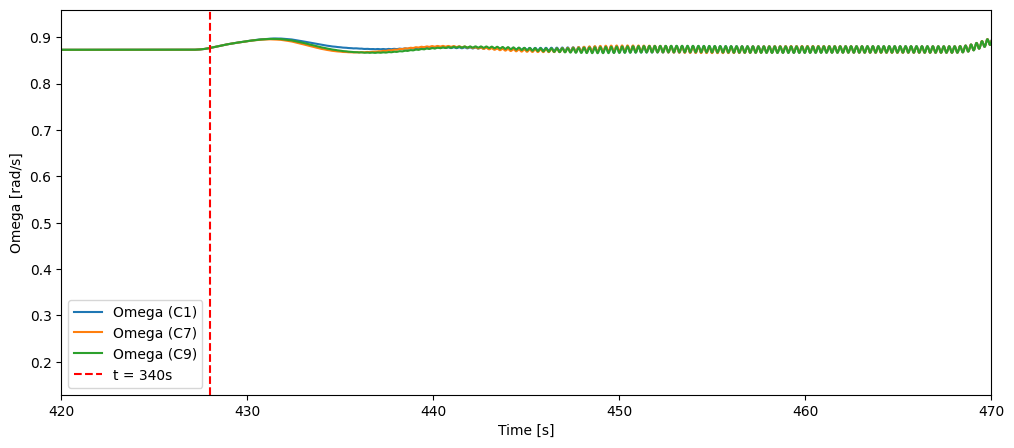

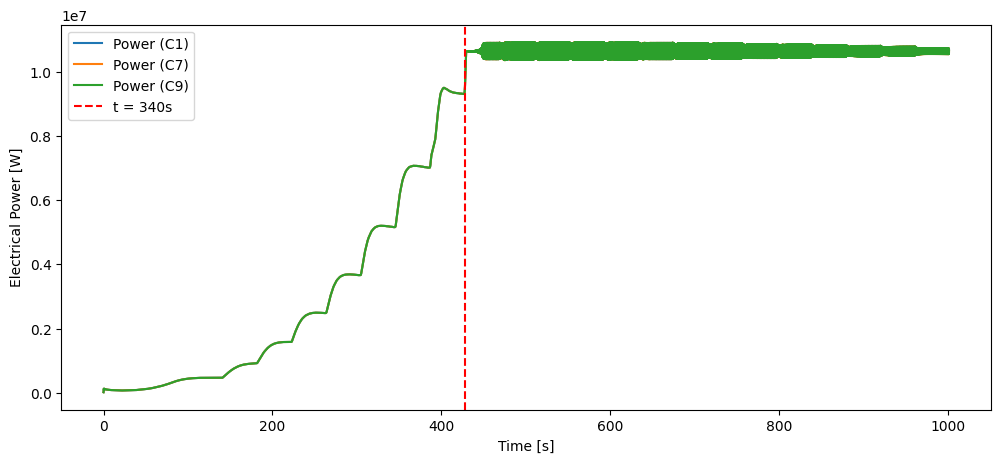

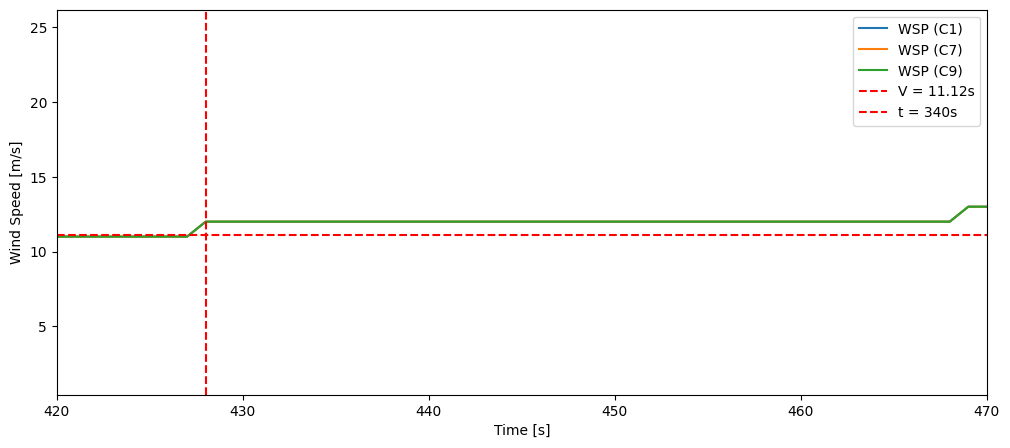

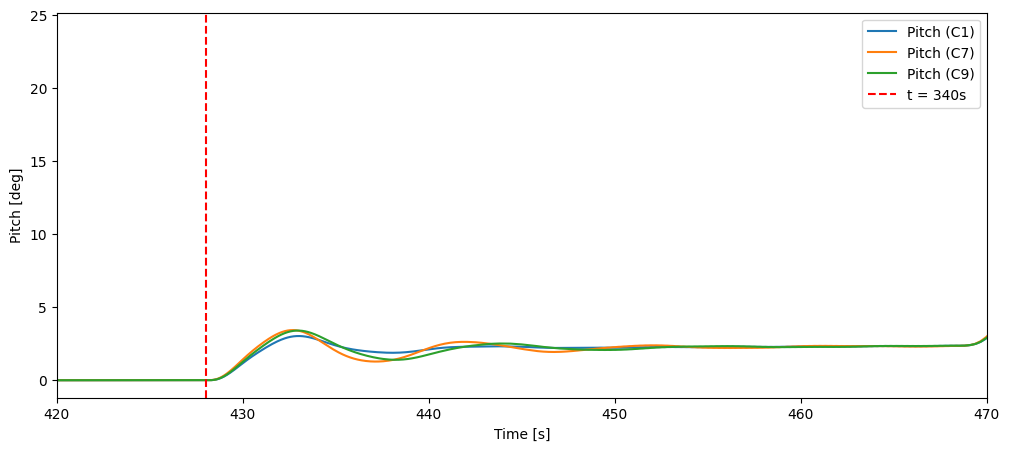

In [99]:
# Define the vertical line position
vertical_line_time = 428
xmin = 420
xmax = 470
horizontal_line_wsp = V_RATED_Y

# Create figure and axes for each variable
fig_omega, ax_omega = plt.subplots(figsize=(12, 5))
fig_power, ax_power = plt.subplots(figsize=(12, 5))
fig_wsp, ax_wsp = plt.subplots(figsize=(12, 5))
fig_pitch, ax_pitch = plt.subplots(figsize=(12, 5))

k=1
# Filename for each iteration
fname = f'our_design/res/Group1_redesign_hawc2s_step_C{k}.hdf5'
h2res = ReadHAWC2(fname)

# Retrieve channel information
names, units, desc = h2res.chaninfo

# Extract indices for time, WSP, Omega, pitch, and power
idx_Time = np.where(['Time [s]' in name for name in names])[0]
idx_WSP = np.where(['WSP gl. coo.,Vy' in name for name in names])[0]
idx_Omega = np.where(['Omega' in name for name in names])[0]
idx_pitch = np.where(['bea2 angle' in name for name in names])[0]
idx_power = np.where(['DLL inp   2:   2' in name for name in names])[0]
[print(desc[i]) for i in idx_power]
# Plot WSP
ax_wsp.plot(h2res.t, h2res.data[:, idx_WSP], label=f'WSP (C{k})')

# Plot Pitch
ax_pitch.plot(h2res.t, h2res.data[:, idx_pitch[0]], label=f'Pitch (C{k})')

# Plot Omega
ax_omega.plot(h2res.t, h2res.data[:, idx_Omega], label=f'Omega (C{k})')

# Plot Power
ax_power.plot(h2res.t, h2res.data[:, idx_power], label=f'Power (C{k})')


for k in range(7,10,2):
    # Filename for each iteration
    fname = f'our_design/res/Group1_redesign_hawc2s_step_C{k}.hdf5'
    h2res = ReadHAWC2(fname)
    
    # Retrieve channel information
    names, units, desc = h2res.chaninfo

    # Extract indices for time, WSP, Omega, pitch, and power
    idx_Time = np.where(['Time [s]' in name for name in names])[0]
    idx_WSP = np.where(['WSP gl. coo.,Vy' in name for name in names])[0]
    idx_Omega = np.where(['Omega' in name for name in names])[0]
    idx_pitch = np.where(['bea2 angle' in name for name in names])[0]
    idx_power = np.where(['DLL inp   2:   2' in name for name in names])[0]
    [print(desc[i]) for i in idx_power]
    # Plot WSP
    ax_wsp.plot(h2res.t, h2res.data[:, idx_WSP], label=f'WSP (C{k})')
    
    # Plot Pitch
    ax_pitch.plot(h2res.t, h2res.data[:, idx_pitch[0]], label=f'Pitch (C{k})')
    
    # Plot Omega
    ax_omega.plot(h2res.t, h2res.data[:, idx_Omega], label=f'Omega (C{k})')

    # Plot Power
    ax_power.plot(h2res.t, h2res.data[:, idx_power], label=f'Power (C{k})')



# Add vertical line at t = 340s on each plot
ax_wsp.axhline(y=horizontal_line_wsp, color='red', linestyle='--', label=f'V = {V_RATED_Y:.2f}s')
ax_wsp.axvline(x=vertical_line_time, color='red', linestyle='--', label='t = 340s')
ax_pitch.axvline(x=vertical_line_time, color='red', linestyle='--', label='t = 340s')
ax_omega.axvline(x=vertical_line_time, color='red', linestyle='--', label='t = 340s')
ax_power.axvline(x=vertical_line_time, color='red', linestyle='--', label='t = 340s')


# Set labels and titles for WSP plot
ax_wsp.set_xlabel('Time [s]')
ax_wsp.set_ylabel('Wind Speed [m/s]')
ax_wsp.set(xlim=[xmin, xmax])
ax_wsp.legend()

# Set labels and titles for Pitch plot
ax_pitch.set_xlabel('Time [s]')
ax_pitch.set_ylabel('Pitch [deg]')
ax_pitch.set(xlim=[xmin, xmax])
ax_pitch.legend()

# Set labels and titles for Omega plot
ax_omega.set_xlabel('Time [s]')
ax_omega.set_ylabel('Omega [rad/s]')
ax_omega.set(xlim=[xmin, xmax])
ax_omega.legend()

# Set labels and titles for Power plot
ax_power.set_xlabel('Time [s]')
ax_power.set_ylabel('Electrical Power [W]')
#x_power.set(xlim=[xmin, xmax],ylim=[10000000,12000000])
ax_power.legend()

# Save each figure to a file
fig_omega.savefig('omega_plot_17.pdf')  # Save Omega plot
fig_power.savefig('power_plot_17.pdf')  # Save Power plot
fig_wsp.savefig('wsp_plot_17.pdf')      # Save WSP plot
fig_pitch.savefig('pitch_plot_17.png')  # Save Pitch plot

# Show all plots
plt.show()
